### EDA on titanic Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Description

| Variable|	Definition  | Key |
| --- | --- | --- |
| survival|	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex	|
| Age |	Age in years |	
| sibsp |	# of siblings / spouses aboard the Titanic	|
| parch |	# of parents / children aboard the Titanic	|
| ticket |	Ticket number	|
| fare |	Passenger fare	|
| cabin |	Cabin number	|
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |


## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
# checking for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked columns have null values

In [17]:
# PClass is a proxy for Socio Economic status, how does being rich or being poor effect the chances of survival

Pclassdist = pd.DataFrame(data.Pclass.value_counts())
Pclassdist['%'] = np.round(Pclassdist/len(data['Pclass']) * 100,2)
Pclassdist

,Pclass,%
3,491,55.11
1,216,24.24
2,184,20.65


we see that 55% of the passesngers in the ship are in third class

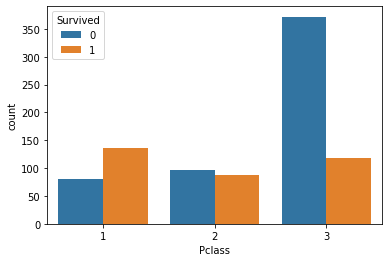

In [35]:
# distribution of survivals in each class
sns.countplot(data['Pclass'], hue =data['Survived'])

Upper(1) class is the only class where the count of survived is more than count of deceased

In [59]:
pd.crosstab(data['Survived'],data['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [85]:
survper_each_class = pd.crosstab(data['Pclass'],data['Survived'])
survper_each_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [87]:
survper_each_class['Sur%_per_class']=np.round(survper_each_class[[0,1]][1]/ (survper_each_class[[0,1]][1] + survper_each_class[[0,1]][0]),2)
survper_each_class

Survived,0,1,Sur%_per_class
Pclass,,,
1,80,136,0.63
2,97,87,0.47
3,372,119,0.24


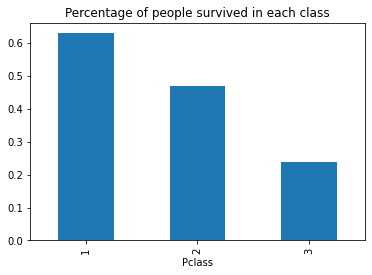

In [104]:
survper_each_class[[0, 1, 'Sur%_per_class']]['Sur%_per_class'].plot.bar();
plt.title('Percentage of people survived in each class');

percentage of people survived in each class

| Class | chance of survival |
| --- | --- |
| Upper | 63% |
| Middle | 47% |
| Lower | 24% |


Pclass is an important feature in determining the survival of a person

In [271]:
# testing the above hypothesis using chi-square test

table,results = rp.crosstab(data['Pclass'],data['Survived'],test='chi-square')
print(table)
results

       Survived          
              0    1  All
Pclass                   
1            80  136  216
2            97   87  184
3           372  119  491
All         549  342  891


,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,102.8890
1,p-value =,0.0000
2,Cramer's V =,0.3398


p-value < 0.05, Pclass and Survival are in association with each other, the above hypothesis holda true

Is there any impact of Sex of Person on his/her Survial ??


In [110]:
Sexdist = pd.DataFrame(data['Sex'].value_counts())
Sexdist['%'] = np.round(Sexdist['Sex']/len(data['Sex']),2)
Sexdist

,Sex,%
male,577,0.65
female,314,0.35


The Ship contains 65% male population

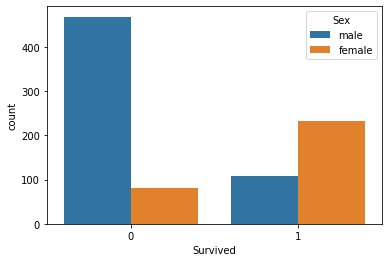

In [113]:
sns.countplot(data['Survived'],hue=data['Sex']);

Looks like Female population survived more than male population, let's look in terms of percentages

In [115]:
Sex_Suvi_dist = pd.crosstab(data['Sex'],data['Survived'])
Sex_Suvi_dist

Survived,0,1
Sex,,
female,81,233
male,468,109


In [127]:
Sex_Suvi_dist['Sex_Suvi_prcnt'] = np.round(Sex_Suvi_dist[[0,1]][1]/(Sex_Suvi_dist[[0,1]][0] + Sex_Suvi_dist[[0,1]][1]),2)
Sex_Suvi_dist

Survived,0,1,Sex_Suvi_prcnt
Sex,,,
female,81,233,0.74
male,468,109,0.19


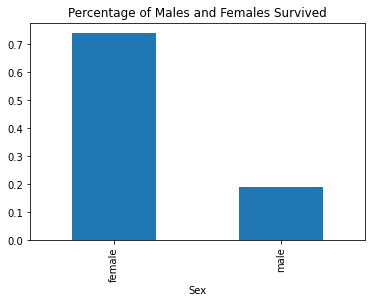

In [125]:
Sex_Suvi_dist[[0, 1, 'Sex_Suvi_prcnt']]['Sex_Suvi_prcnt'].plot.bar();
plt.title('Percentage of Males and Females Survived');

| Sex | Survival_Percenatge |
| --- | --- |
| Female | 74% |
| Male | 19% |


If a Person is Female there is 74% chance that she will Survive

Sex is also an important feature in determining whether a person will survive or not

In [272]:
# testing the above hypothesis using chi-square test

table,results = rp.crosstab(data['Sex'],data['Survived'],test='chi-square')
print(table)
results

       Survived          
              0    1  All
Sex                      
female       81  233  314
male        468  109  577
All         549  342  891


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,263.0506
1,p-value =,0.0000
2,Cramer's phi =,0.5434


p-value < 0.05, Sex and Survival are in association with each other, the above hypothesis holds true

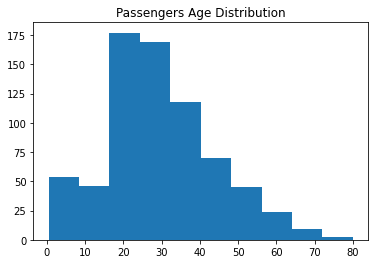

In [133]:
# Which age group people are more likely to survive

plt.hist(data['Age']);
plt.title('Passengers Age Distribution');

There are more Passengers between the age group of 20-40

In [152]:
data['Age'].groupby(data['Survived']).mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Average Age of People who dies is 30.6      
Average Age of People Who Survived is 28.3

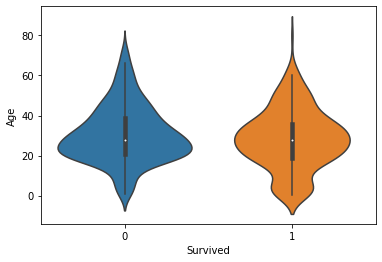

In [162]:
sns.violinplot( "Survived" ,"Age", data=data);

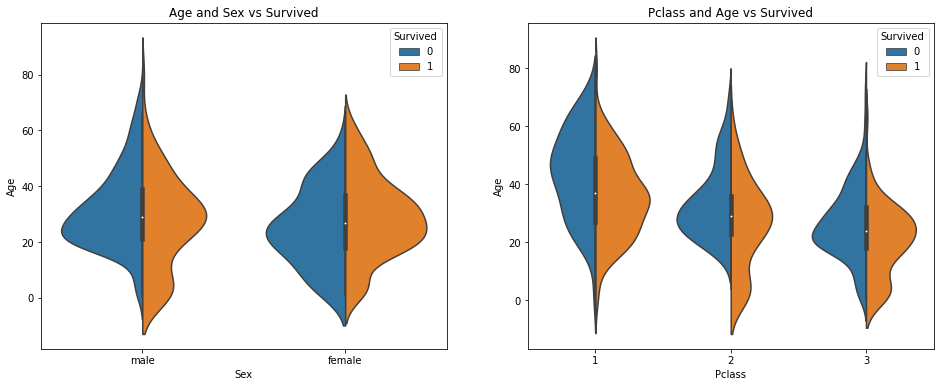

In [158]:
fig,ax = plt.subplots(1,2, figsize=(16,6))
sns.violinplot('Sex', 'Age', hue = 'Survived', data=data, split=True, ax=ax[0]);
ax[0].set_title('Age and Sex vs Survived')
sns.violinplot('Pclass','Age',hue='Survived',data =data, split=True, ax=ax[1]);
ax[1].set_title('Pclass and Age vs Survived');

If a person is in between the age 20-40,there is more probability that he will not survive     
Older people in Upper class are more likely to die than the younger ones       


SibSp represents the number of Siblings and spouses are aboard

In [ ]:
# Is there more chance of survival if there are more Siblings/spouses on the ship??

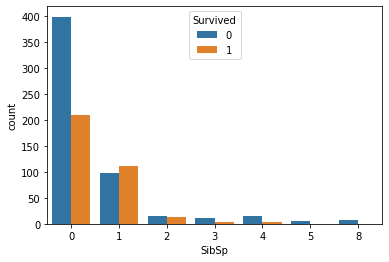

In [174]:
sns.countplot("SibSp",hue="Survived",data=data);

Passengers with 1 or 2 Siblings in the ship are more likely to survive 

In [184]:
SibSp_Survi = pd.crosstab(data['SibSp'],data['Survived'])
SibSp_Survi['SibSp_Sur%'] = np.round(SibSp_Survi[[0,1]][1]/(SibSp_Survi[[0,1]][0] + SibSp_Survi[[0,1]][1]),2)
SibSp_Survi

Survived,0,1,SibSp_Sur%
SibSp,,,
0,398,210,0.35
1,97,112,0.54
2,15,13,0.46
3,12,4,0.25
4,15,3,0.17
5,5,0,0.00
8,7,0,0.00


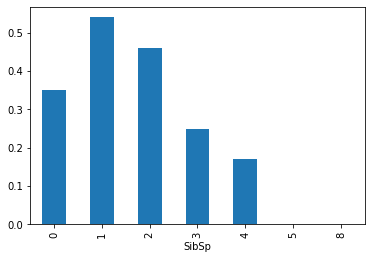

In [186]:
SibSp_Survi['SibSp_Sur%'].plot.bar();

| SibSp(no. of siblings/spouse) | Chance of Survival |
| --- | --- |
| 0 | 35% |
| 1 | 54% |
| 2 | 46% |
| 3 | 25% |
| 4 | 17% |
| 5 | 0% |
| 8 | 0% |

In [269]:
# Testing teh above hypothesis
table,results = rp.crosstab(data['SibSp'],data['Survived'], test='chi-square')

print(table)
results

      Survived          
             0    1  All
SibSp                   
0          398  210  608
1           97  112  209
2           15   13   28
3           12    4   16
4           15    3   18
5            5    0    5
8            7    0    7
All        549  342  891


,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,37.2718
1,p-value =,0.0000
2,Cramer's V =,0.2045


p<0.05 , SibSp and Survived are in association with each other

parch denotes the the number of parents/children of a passenger are aboard

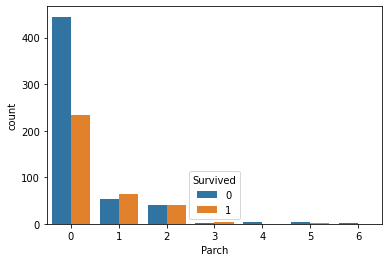

In [189]:
sns.countplot("Parch",hue="Survived",data=data);

we see that the passengers 1,2,3 parents/children abord have higher chances of survival

In [190]:
Parch_Survi = pd.crosstab(data['Parch'],data['Survived'])
Parch_Survi['Parch_Sur%'] = np.round(Parch_Survi[[0,1]][1]/(Parch_Survi[[0,1]][0] + Parch_Survi[[0,1]][1]),2)
Parch_Survi

Survived,0,1,Parch_Sur%
Parch,,,
0,445,233,0.34
1,53,65,0.55
2,40,40,0.50
3,2,3,0.60
4,4,0,0.00
5,4,1,0.20
6,1,0,0.00


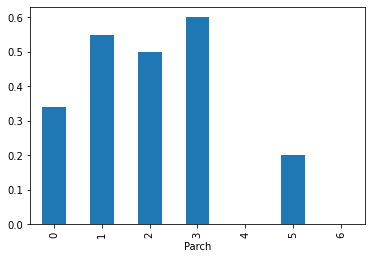

In [192]:
Parch_Survi['Parch_Sur%'].plot.bar();

| Parch(no. of parents/children) | Chance of Survival |
| --- | --- |
| 0 | 34% |
| 1 | 55% |
| 2 | 50% |
| 3 | 60% |
| 4 | 0% |
| 5 | 20% |
| 8 | 0% |

In [270]:
# testing the above hypothesis
table,results = rp.crosstab(data['Parch'],data['Survived'], test='chi-square')

print(table)
results

      Survived          
             0    1  All
Parch                   
0          445  233  678
1           53   65  118
2           40   40   80
3            2    3    5
4            4    0    4
5            4    1    5
6            1    0    1
All        549  342  891


,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,27.9258
1,p-value =,0.0001
2,Cramer's V =,0.1770


p<0.05, Parch and Survived are in association with each other

In [203]:
Parch_SibSp_Sur = pd.crosstab([data['Parch'],data['SibSp']],data['Survived'])
Parch_SibSp_Sur['Parch_SibSp_Sur%'] = np.round(Parch_SibSp_Sur[[0,1]][1] / (Parch_SibSp_Sur[[0,1]][1] + Parch_SibSp_Sur[[0,1]][0]),2) 
Parch_SibSp_Sur

Survived       0    1  Parch_SibSp_Sur%
Parch SibSp                            
0     0      374  163              0.30
      1       59   64              0.52
      2       12    4              0.25
      3        0    2              1.00
1     0       13   25              0.66
      1       23   34              0.60
      2        1    6              0.86
      3        7    0              0.00
      4        9    0              0.00
2     0        8   21              0.72
      1        7   12              0.63
      2        2    2              0.50
      3        5    2              0.29
      4        6    3              0.33
      5        5    0              0.00
      8        7    0              0.00
3     0        0    1              1.00
      1        2    1              0.33
      2        0    1              1.00
4     0        1    0              0.00
      1        3    0              0.00
5     0        2    0              0.00
      1        2    1              0.33
6     1        1    0              0.00

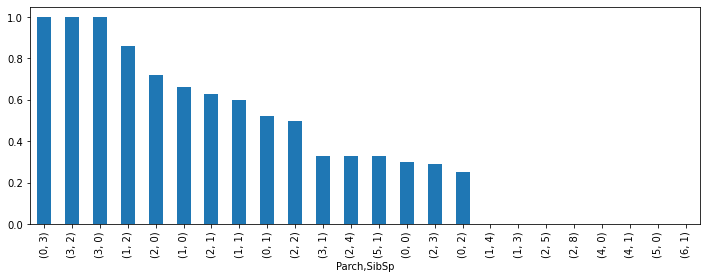

In [210]:
plt.figure(figsize= (12,4))
Parch_SibSp_Sur['Parch_SibSp_Sur%'].sort_values(ascending = False).plot.bar();

Does Fare has anything to do eith the survival of a passenger?

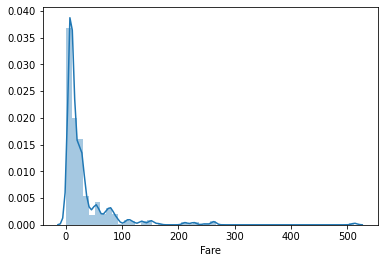

In [217]:
sns.distplot(data['Fare']);

there are more number of passengers travelling low fare and viceversa

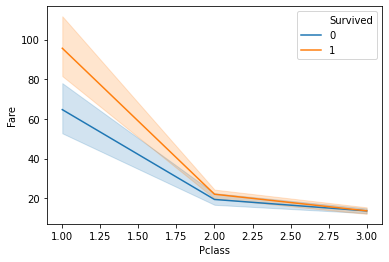

In [231]:
sns.lineplot('Pclass',"Fare",hue='Survived',data=data);

from the plot we see that in all the classes, people who paid more are more likely to survive than the people who paid less

In [235]:
data['Fare'].groupby(data['Survived']).mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Average Fare of Suvived people is twice as much as the average fare of deceased

In [379]:
# Does the Cabin in which a passenger is determine the Survival??

In [248]:
table,results = rp.crosstab(data['Cabin'],data['Survived'],test='chi-square')

print(table)
results

      Survived          
             0    1  All
Cabin                   
A10          1    0    1
A14          1    0    1
A16          0    1    1
A19          1    0    1
A20          0    1    1
...        ...  ...  ...
F38          1    0    1
F4           0    2    2
G6           2    2    4
T            1    0    1
All         68  136  204

[148 rows x 3 columns]


,Chi-square test,results
0,Pearson Chi-square ( 146.0) =,161.2500
1,p-value =,0.1836
2,Cramer's V =,0.8891


p > 0.05, hence there is no association between Cabin and Survival

Cabin has lot of null values

In [386]:
print("Cabin has {}% of null values".format(np.round(data['Cabin'].isna().sum()/len(data),2)*100 ))

Cabin has 77.0% of null values


In [392]:
print("Cabin has " + str((len(data) - data['Cabin'].isna().sum()))+ " values of which " + str(len(data['Cabin'].unique())) + ' are unique')

Cabin has 204 values of which 148 are unique


Hence We can drop "Cabin", as it is not going to give any usefull information

In [394]:
data.drop(columns=['Cabin'],inplace=True)

Does the survival of a passeneger depend on the port in which the passenger Embarked?

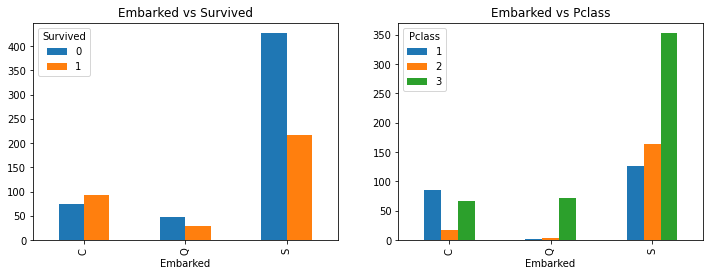

In [267]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
pd.crosstab(data['Embarked'],data['Survived']).plot.bar(ax=ax[0]);
ax[0].set_title('Embarked vs Survived');
pd.crosstab(data['Embarked'],data['Pclass']).plot.bar(ax =ax[1]);
ax[1].set_title('Embarked vs Pclass');

C = Cherbourg, Q = Queenstown, S = Southampton


from the above plot we see that majority of the passengers from Cherbourg are travelling in Upper class,  and they are more likely to survive than passengers who embarked from other ports

In [268]:
table,results = rp.crosstab(data['Embarked'],data['Survived'], test='chi-square')

print(table)
results

         Survived          
                0    1  All
Embarked                   
C              75   93  168
Q              47   30   77
S             427  217  644
All           549  340  889


,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,26.4891
1,p-value =,0.0000
2,Cramer's V =,0.1726


p-value < 0.05 , Embarked and Survival are in association with each other

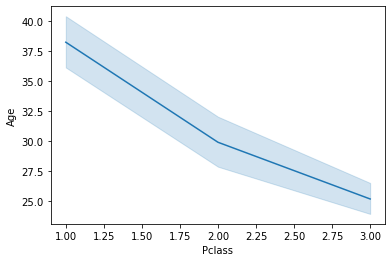

In [287]:
sns.lineplot("Pclass",'Age', data=data)

In [295]:
Age_dict = dict(data['Age'].groupby(data['Pclass']).median())
Age_dict

{1: 37.0, 2: 29.0, 3: 24.0}

In [332]:
cond = data['Age'].isna()
data['Age'] = data['Age'].fillna(data['Pclass'].map(Age_dict))

In [335]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


the two data points are from Upper Class, Female and Survived

In [365]:
freq_port = data[(data['Survived'] ==1 ) & (data['Pclass'] == 1) & (data['Sex']=='female')]['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(freq_port)

In [397]:
## verifying if any null values are present

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64